In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

## Data Preprocessing

In [3]:
train_dir = '/media/shreyashkharat/Storage Drive/Machine Learning, Deep Learning/Python/Projects/Image Classification Model/Color Data/data/training_set'
validation_dir = '/media/shreyashkharat/Storage Drive/Machine Learning, Deep Learning/Python/Projects/Image Classification Model/Color Data/data/validation_set'
test_dir = '/media/shreyashkharat/Storage Drive/Machine Learning, Deep Learning/Python/Projects/Image Classification Model/Color Data/data/test_set'

Process for getting data from images:
* Read the picture files.
* Decode the JPEG into RGB grods of pixels.
* Convert these into floating point tensors.
* Rescale the pixel values into [0,1] intervals.

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator as idg

In [5]:
train_data_idg = idg(rescale = 1./255)
test_data_idg = idg(rescale = 1./255)
train_generator = train_data_idg.flow_from_directory(train_dir, target_size = (150, 150), batch_size = 20, class_mode = 'binary')
validation_generator = test_data_idg.flow_from_directory(validation_dir, target_size = (150, 150), batch_size = 20, class_mode = 'binary')
# target_size is the resized size we want.

Found 6000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [6]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [7]:
model_cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

In [8]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [9]:
from tensorflow.keras import optimizers
model_cnn.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(learning_rate = 0.00001), metrics = ['acc'])

In [10]:
history = model_cnn.fit_generator(train_generator, steps_per_epoch = 100, epochs = 50, validation_data = validation_generator, validation_steps = 50)

/home/shreyashkharat/.local/lib/python3.9/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
100/100 [==============================] - 87s 851ms/step - loss: 0.6920 - acc: 0.5210 - val_loss: 0.6895 - val_acc: 0.5890
Epoch 2/50
100/100 [==============================] - 52s 521ms/step - loss: 0.6875 - acc: 0.5615 - val_loss: 0.6856 - val_acc: 0.5910
Epoch 3/50
100/100 [==============================] - 48s 477ms/step - loss: 0.6832 - acc: 0.5780 - val_loss: 0.6822 - val_acc: 0.5170
Epoch 4/50
100/100 [==============================] - 43s 432ms/step - loss: 0.6786 - acc: 0.5695 - val_loss: 0.6760 - val_acc: 0.6270
Epoch 5/50
100/100 [==============================] - 44s 434ms/step - loss: 0.6738 - acc: 0.6085 - val_loss: 0.6723 - val_acc: 0.6020
Epoch 6/50
100/100 [==============================] - 43s 429ms/step - loss: 0.6708 - acc: 0.6015 - val_loss: 0.6690 - val_acc: 0.6010
Epoch 7/50
100/100 [==============================] - 43s 425ms/step - loss: 0.6625 - acc: 0.6210 - val_loss: 0.6605 - val_acc: 0.6280
Epoch 8/50
100/100 [==============================] - 4

## Performance Evaluation

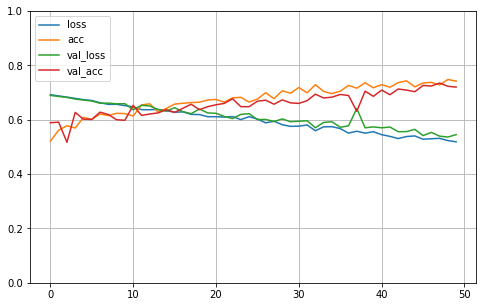

In [11]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

* The accuracy is upto 0.7480.

In [12]:
model_cnn.save('model_cnn.h5')
from tensorflow.keras import backend
backend.clear_session()

## Data Augmentation

### Preprocessing

In [13]:
train_data_aug = idg(rescale = 1./255, rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_data_aug = idg(rescale = 1./255, rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
train_gen_aug = train_data_aug.flow_from_directory(train_dir, target_size = (150, 150), batch_size = 32, class_mode = 'binary')
valid_gen_aug = test_data_aug.flow_from_directory(validation_dir, target_size = (150, 150), batch_size = 32, class_mode = 'binary')

Found 6000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### Model Architectue

In [14]:
from tensorflow.keras import layers
from tensorflow.keras import models
model_cnn_aug = models.Sequential([
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])
# The dropout layer drops given percentage of neurons to avoid over-fitting.

In [15]:
model_cnn_aug.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [16]:
from tensorflow.keras import optimizers
model_cnn_aug.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(learning_rate = 0.0001), metrics = ['acc'])

In [17]:
history_aug = model_cnn_aug.fit_generator(train_gen_aug, steps_per_epoch = 100, epochs = 60, validation_data = valid_gen_aug, validation_steps = 50)

/home/shreyashkharat/.local/lib/python3.9/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/60
100/100 [==============================] - 97s 954ms/step - loss: 0.6934 - acc: 0.5203 - val_loss: 0.6845 - val_acc: 0.5250
Epoch 2/60
100/100 [==============================] - 92s 921ms/step - loss: 0.6770 - acc: 0.5713 - val_loss: 0.6660 - val_acc: 0.5975
Epoch 3/60
100/100 [==============================] - 97s 973ms/step - loss: 0.6629 - acc: 0.5822 - val_loss: 0.6884 - val_acc: 0.5344
Epoch 4/60
100/100 [==============================] - 92s 923ms/step - loss: 0.6564 - acc: 0.6053 - val_loss: 0.6486 - val_acc: 0.6112
Epoch 5/60
100/100 [==============================] - 92s 921ms/step - loss: 0.6508 - acc: 0.6103 - val_loss: 0.6298 - val_acc: 0.6556
Epoch 6/60
100/100 [==============================] - 92s 919ms/step - loss: 0.6394 - acc: 0.6231 - val_loss: 0.6253 - val_acc: 0.6625
Epoch 7/60
100/100 [==============================] - 92s 923ms/step - loss: 0.6209 - acc: 0.6500 - val_loss: 0.6076 - val_acc: 0.6712
Epoch 8/60
100/100 [==============================] - 9

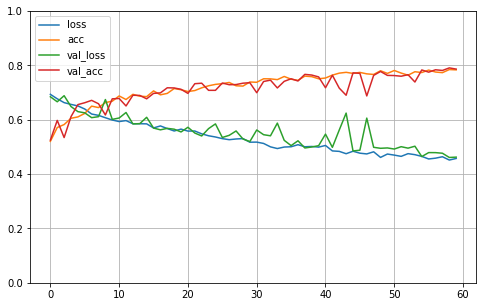

In [18]:
pd.DataFrame(history_aug.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [19]:
model_cnn_aug.save('model_cnn_aug.h5')
from tensorflow.keras import backend
backend.clear_session()

## VGG16

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator as idg
train_data_vgg = idg(rescale = 1./255, rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_data_vgg = idg(rescale = 1./255)
train_gen_vgg = train_data_vgg.flow_from_directory(train_dir, target_size = (150, 150), batch_size = 20, class_mode = 'binary')
validation_gen_vgg = test_data_vgg.flow_from_directory(validation_dir, target_size = (150, 150), batch_size = 20, class_mode = 'binary')

Found 6000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [21]:
from tensorflow.keras.applications import VGG16
vvg_convo = VGG16(weights = 'imagenet', include_top = False, input_shape = (150, 150, 3))

In [22]:
from tensorflow.keras import models, layers
model_vgg = models.Sequential([
    vvg_convo,
    layers.Flatten(),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

In [23]:
from tensorflow.keras import optimizers
model_vgg.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(learning_rate = 0.0002), metrics = ['acc'])

In [24]:
checkpoints = keras.callbacks.ModelCheckpoint('model_vgg.h5')

In [ ]:
history_vgg = model_vgg.fit_generator(train_gen_vgg, steps_per_epoch = 100, epochs = 40, validation_data = validation_gen_vgg, validation_steps = 50, callbacks = [checkpoints])

In [ ]:
pd.DataFrame(history_vgg.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

* The above vgg model is not trianed due to high computational time (takes upto 8-10 mins per epoch).
* So, the augmented CNN models gives best accuracy on validation set upto 0.7906.